# MINNING

In [78]:
# framework
using GeoStats

# IO modules
using CSV

# viz modules
using PairPlots
import CairoMakie as Mke

In [79]:
url = "https://zenodo.org/record/7051975/files/drillholes.csv?download=1"

Data0 = download(url)

Data =CSV.File(Data0 )

dtable = GeoStats.georef(Data, ("X", "Y", "Z"))

HOLEID,Ag ppm,Al ppm,Au ppm,C ppm,Ca ppm,Cl ppm,Cu ppm,F ppm,Fe ppm,K ppm,Mg ppm,Mn ppm,Na ppm,P ppm,Pb ppm,S ppm,Th ppm,U ppm,geometry
Categorical,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Point3
[NoUnits],[NoUnits],[NoUnits],[NoUnits],[NoUnits],[NoUnits],[NoUnits],[NoUnits],[NoUnits],[NoUnits],[NoUnits],[NoUnits],[NoUnits],[NoUnits],[NoUnits],[NoUnits],[NoUnits],[NoUnits],[NoUnits],
1,0.64,42900.0,1.04,800.0,15100.0,1985.11,7200.0,858.0,351800.0,8300.0,6700.0,1550.44,17800.0,1094.44,20.68,6100.0,2.2,31.37,"(559.725, -513.31, 252.82)"
1,0.2,70100.0,0.06,400.0,8300.0,5046.67,1000.0,3318.89,215200.0,24600.0,10400.0,2717.78,9700.0,960.0,3.89,600.0,5.02,4.78,"(558.955, -515.23, 246.87)"
1,3.44,14000.0,2.02,900.0,12600.0,1467.2,21800.0,699.6,462600.0,4200.0,3200.0,1216.52,4300.0,937.2,20.64,11700.0,1.41,30.57,"(557.225, -519.61, 233.37)"
1,4.88,19600.0,3.43,900.0,4500.0,606.79,22900.0,1285.71,444900.0,6100.0,4700.0,2504.82,2600.0,1024.29,18.0,11000.0,1.43,34.46,"(555.375, -524.3, 218.92)"
1,1.25,54300.0,0.5,2500.0,5600.0,3598.69,5900.0,3353.23,288600.0,22300.0,4600.0,4249.9,1900.0,369.39,6.89,2200.0,3.28,10.33,"(553.825, -528.21, 206.94)"
1,0.9,53400.0,0.9,800.0,7100.0,7258.35,5600.0,4759.49,292900.0,27600.0,4100.0,3870.0,8900.0,473.67,29.52,2800.0,4.29,63.21,"(552.075, -532.56, 193.91)"
1,0.93,4700.0,3.56,400.0,10300.0,1220.52,20000.0,538.08,485400.0,400.0,4200.0,1278.0,900.0,2236.21,83.06,19600.0,3.35,181.1,"(550.305, -537.08, 180.8)"
1,0.76,67200.0,0.21,500.0,6300.0,1404.94,2800.0,2975.83,239700.0,19100.0,19300.0,3640.37,700.0,1308.62,5.51,1400.0,5.26,9.19,"(547.495, -544.31, 160.08)"


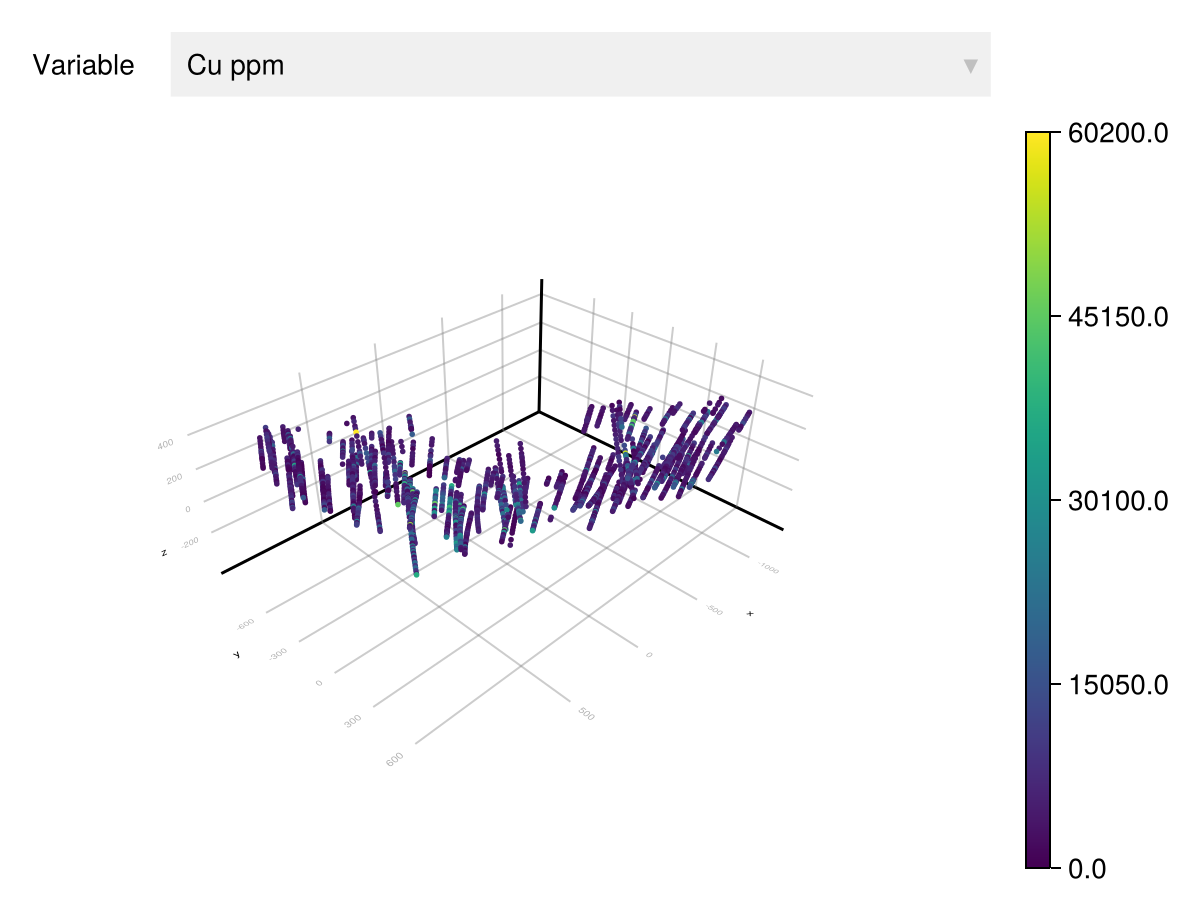

In [80]:
dtable |> Select("Cu ppm") |> viewer

In [81]:
dtable |> describe
names(dtable)

20-element Vector{String}:
 "HOLEID"
 "Ag ppm"
 "Al ppm"
 "Au ppm"
 "C ppm"
 "Ca ppm"
 "Cl ppm"
 "Cu ppm"
 "F ppm"
 "Fe ppm"
 "K ppm"
 "Mg ppm"
 "Mn ppm"
 "Na ppm"
 "P ppm"
 "Pb ppm"
 "S ppm"
 "Th ppm"
 "U ppm"
 "geometry"

In [82]:
selectholeid = Select("HOLEID")

selectgrades = Select("Cu ppm" => "Cu",
                      "Au ppm" => "Au",
                      "Ag ppm" => "Ag",
                      "S ppm"  => "S") → 
                      Functional(x -> 1e-4*x*u"percent") # 1 ppm = 1e-4 percent

dclean = selectholeid ⊔ selectgrades 


dtable = dclean(dtable)

# dclean |> describe

HOLEID,Cu,Au,Ag,S,geometry
Categorical,Continuous,Continuous,Continuous,Continuous,Point3
[NoUnits],[%],[%],[%],[%],
1,0.72 %,0.000104 %,6.4e-5 %,0.61 %,"(559.725, -513.31, 252.82)"
1,0.1 %,6.0e-6 %,2.0e-5 %,0.06 %,"(558.955, -515.23, 246.87)"
1,2.18 %,0.000202 %,0.000344 %,1.17 %,"(557.225, -519.61, 233.37)"
1,2.29 %,0.000343 %,0.000488 %,1.1 %,"(555.375, -524.3, 218.92)"
1,0.59 %,5.0e-5 %,0.000125 %,0.22 %,"(553.825, -528.21, 206.94)"
1,0.56 %,9.0e-5 %,9.0e-5 %,0.28 %,"(552.075, -532.56, 193.91)"
1,2.0 %,0.000356 %,9.3e-5 %,1.96 %,"(550.305, -537.08, 180.8)"
1,0.28 %,2.1e-5 %,7.6e-5 %,0.14 %,"(547.495, -544.31, 160.08)"


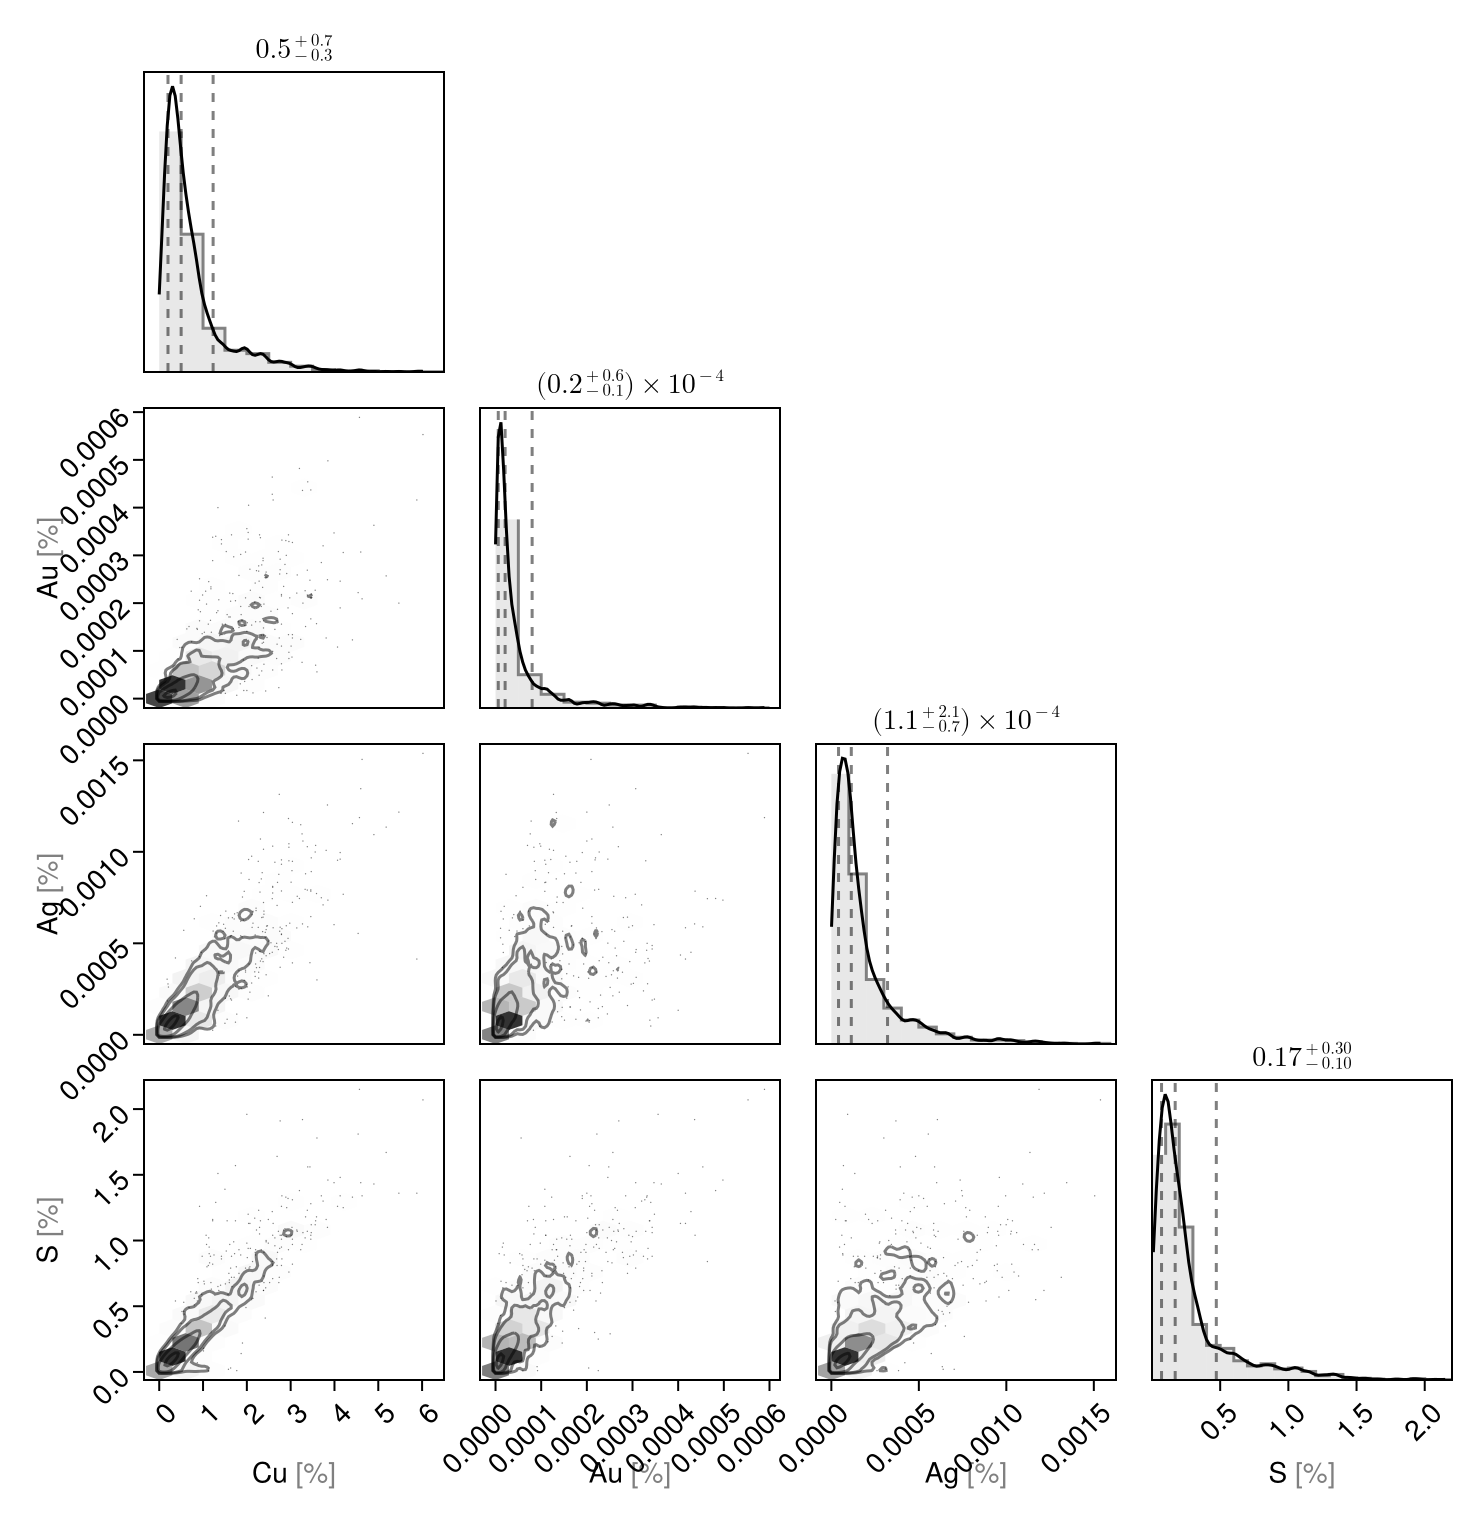

In [83]:
dtable |> Select("Cu", "Au", "Ag", "S") |> values |> pairplot

In [84]:
# compute bounding box
bbox = boundingbox(dtable.geometry)
# size of blocks in meters
bsize = (25.0, 25.0, 12.5)
# define Cartesian grid
grid = CartesianGrid(extrema(bbox)..., bsize)

85×66×66 CartesianGrid{3,Float64}
  minimum: Point(-1150.004825000069, -882.9003199972212, -399.92)
  maximum: Point(974.9951749999309, 767.0996800027788, 425.08)
  spacing: (25.0, 25.0, 12.5)

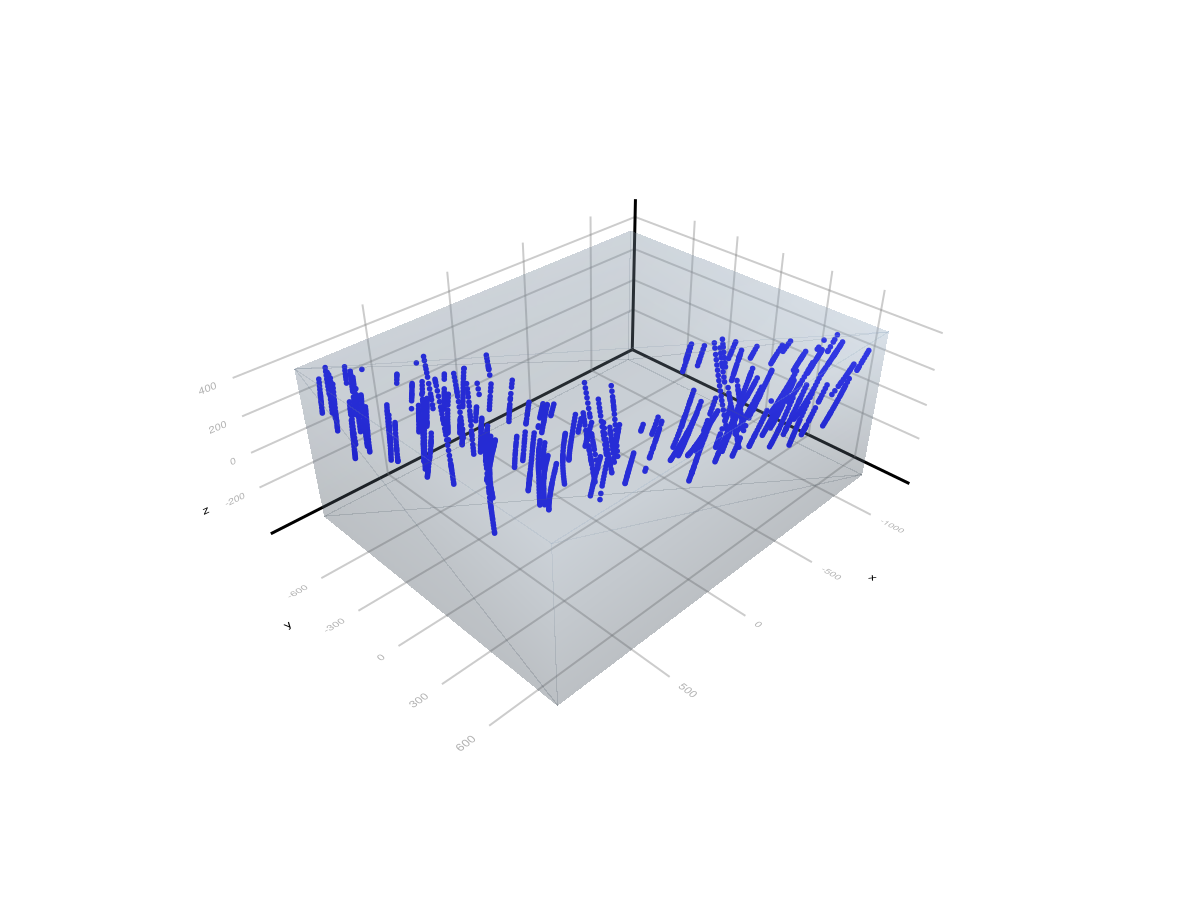

In [91]:
viz(dtable.geometry, color = :blue)
viz!(grid, alpha = 0.2)
Mke.current_figure()

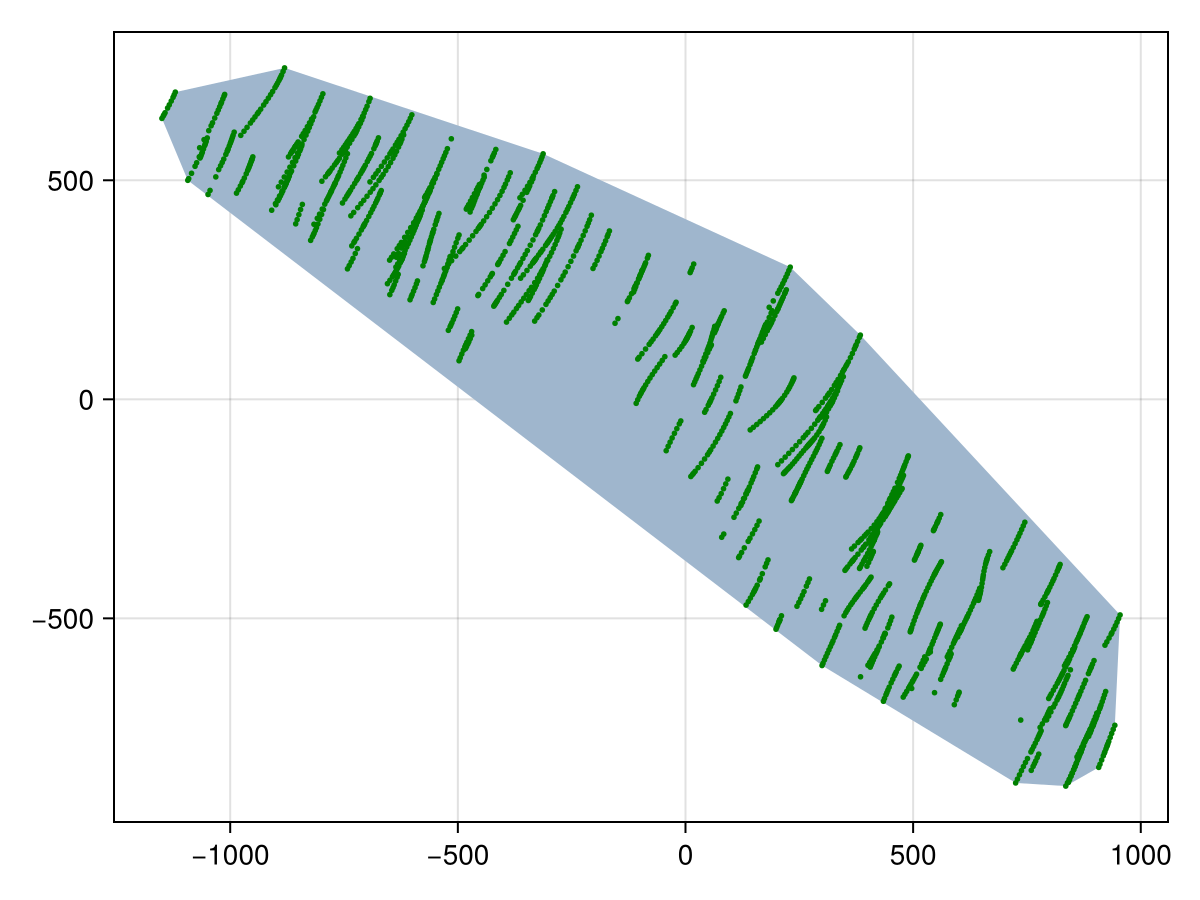

In [96]:
function proj(point)
	x, y, z = coordinates(point)
	Point(x, y)
 end
 
 points = proj.(dtable.geometry)
 
 chull = convexhull(points)

 viz(chull)
 viz!(points, color=:green)
 Mke.current_figure()

In [110]:
active = findall(h -> proj(centroid(h)) ∈ chull, grid)

blocks = view(grid, active) 

viz(blocks)

Mke.current_figure()


MethodError: MethodError: no method matching view(::CartesianGrid{3, Float64})

Closest candidates are:
  view(::Any, !Matched::AbstractDict)
   @ Indexing C:\Users\PollaccoJ\.julia\packages\Indexing\iF84V\src\view.jl:181
  view(::Domain, !Matched::AbstractVector{Int64})
   @ Meshes C:\Users\PollaccoJ\.julia\packages\Meshes\2WI3K\src\viewing.jl:9
  view(::Domain, !Matched::Geometry)
   @ Meshes C:\Users\PollaccoJ\.julia\packages\Meshes\2WI3K\src\viewing.jl:21
  ...


In [118]:
ztable = @chain dtable begin
	@groupby(:HOLEID)
	@transform(:Z = GeoStats.last(GeoStats.coordinates(:geometry)), :geometry = proj(:geometry))
	@combine(:Z = GeoStats.first(:Z), :geometry = GeoStats.first(:geometry))
 end

UndefVarError: UndefVarError: `proj` not defined